In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv(r"C:\Users\vchan\Downloads\Clean_data.csv")
data

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,CPC,Keyword_Category
0,A1000,Data Analytics Course,104.0,4498.0,231.880000,14.0,7.0,0.067308,1892.0,2024-11-16,Hyderabad,Desktop,learn data analytics,2.229615,learning_intent
1,A1001,Data Analytics Course,173.0,5107.0,216.840000,10.0,8.0,0.046243,1679.0,2024-11-16,Hyderabad,Mobile,data analytics course,1.253410,course_intent
2,A1002,Data Analytics Course,90.0,4544.0,203.660000,26.0,9.0,0.100000,1624.0,2024-11-16,Hyderabad,Desktop,data analitics online,2.262889,online_intent
3,A1003,Data Analytics Course,142.0,3185.0,237.660000,17.0,6.0,0.042254,1225.0,2024-11-26,Hyderabad,Tablet,data anaytics training,1.673662,general_intent
4,A1004,Data Analytics Course,156.0,3361.0,195.900000,30.0,8.0,0.051282,1091.0,2024-11-22,Hyderabad,Desktop,online data analytic,1.255769,online_intent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88.0,5344.0,242.070000,17.0,9.0,0.102273,1418.0,2024-11-16,Hyderabad,Mobile,online data analytic,2.750795,online_intent
2596,A3596,Data Analytics Course,154.0,3211.0,248.280000,14.0,6.0,0.038961,1950.0,2024-11-16,Hyderabad,Tablet,data analitics online,1.612208,online_intent
2597,A3597,Data Analytics Course,113.0,3808.0,233.250000,18.0,4.0,0.035398,1085.0,2024-11-02,Hyderabad,Desktop,data anaytics training,2.064159,general_intent
2598,A3598,Data Analytics Course,196.0,5853.0,220.130000,16.0,7.0,0.035714,1558.0,2024-11-08,Hyderabad,Tablet,data anaytics training,1.123112,general_intent


## 1)Keywords and Number of clicks on them

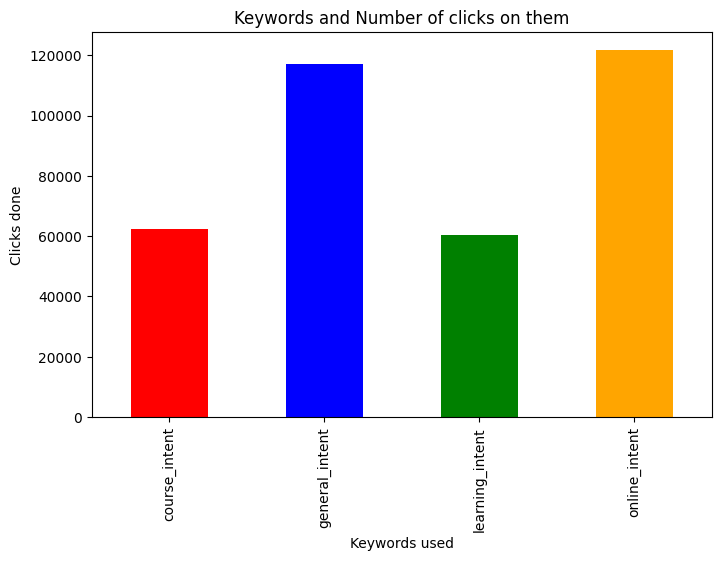

In [ ]:
key_click = data.groupby('Keyword_Category')['Clicks'].sum()
key_click
colours = ['r','b','g','orange']
plt.figure(figsize=(8,5))
key_click.plot(kind='bar',color = colours)
plt.title('Keywords and Number of clicks on them')
plt.xlabel('Keywords used')
plt.ylabel('Clicks done')
plt.show()

## 2)Average Impressions on Devices

In [13]:
lead_device = data.groupby('Device')['Impressions'].mean()
lead_device

Device
Desktop    4526.023086
Mobile     4533.740888
Tablet     4509.039568
Name: Impressions, dtype: float64

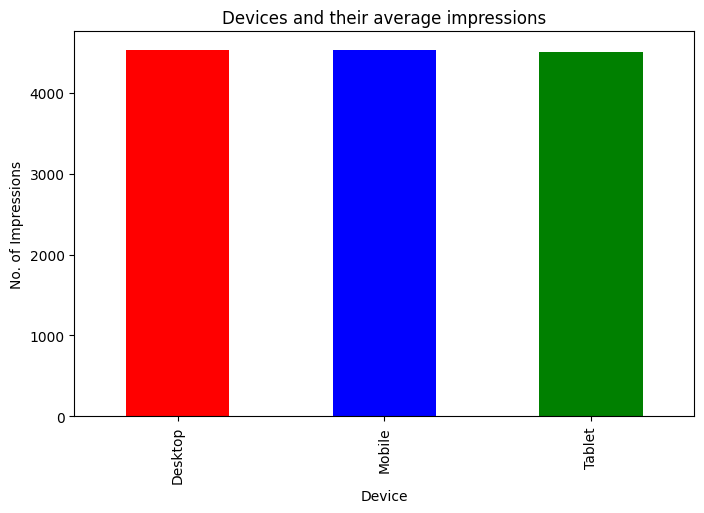

In [15]:
plt.figure(figsize=(8,5))
lead_device.plot(kind='bar',color=colours)
plt.title('Devices and their average impressions')
plt.xlabel('Device')
plt.ylabel('No. of Impressions')
plt.show()


## 3)Conversion Rate by Devices

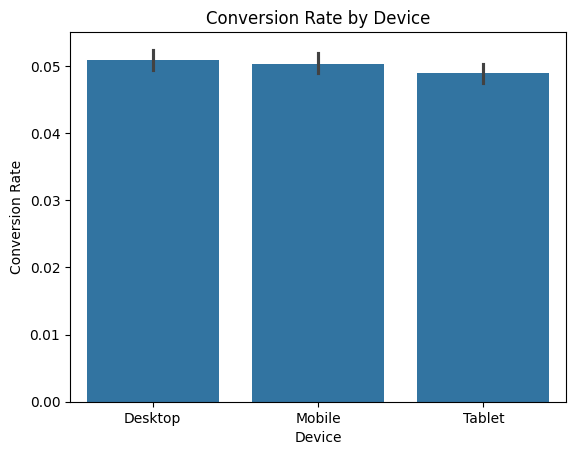

In [24]:
plt.figure()
sns.barplot(data=data, x='Device', y='Conversion Rate')
plt.title('Conversion Rate by Device')
plt.show()


## 4)Click to Conversion Efficiency

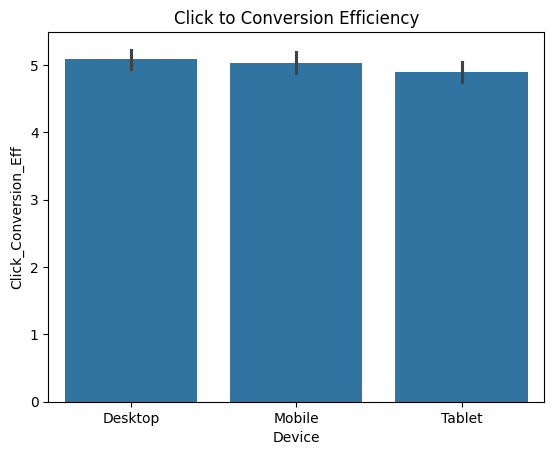

In [27]:
data['Click_Conversion_Eff'] = data['Conversions'] / data['Clicks'] * 100

plt.figure()
sns.barplot(data=data, x='Device', y='Click_Conversion_Eff')
plt.title('Click to Conversion Efficiency')
plt.show()


## 5)ScatterPlot showing relation between cost and sales

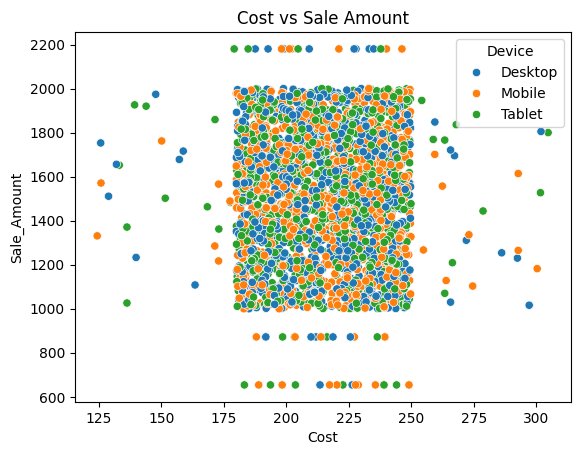

In [ ]:
plt.figure()
sns.scatterplot(data=data, x='Cost', y='Sale_Amount', hue='Device')
plt.title('Cost vs Sale Amount')
plt.show()


## 6)ROI by Devices

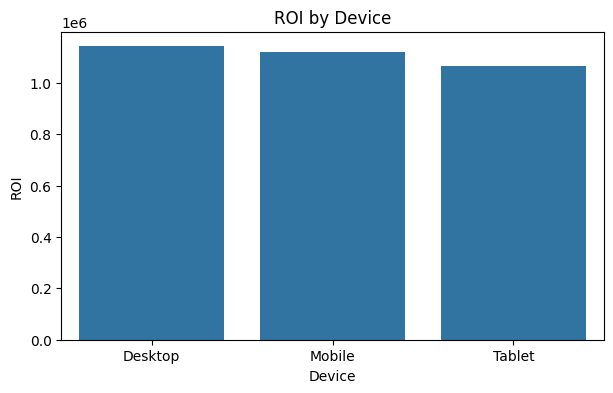

In [37]:
data['ROI'] = data['Sale_Amount'] - data['Cost']
roi_device = data.groupby('Device')['ROI'].sum().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=roi_device, x='Device', y='ROI')
plt.title('ROI by Device')
plt.show()


## 7)BoxPlot by Devices

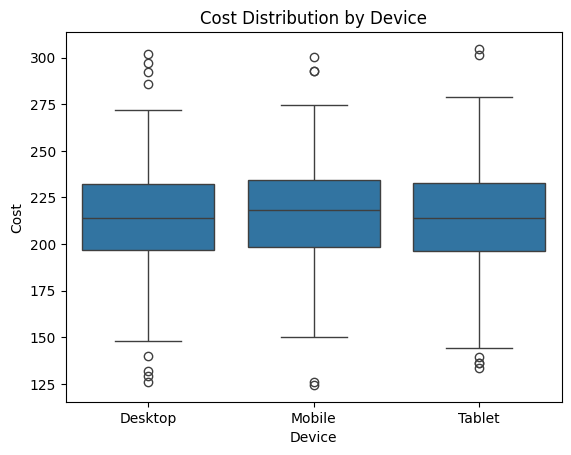

In [39]:
plt.figure()
sns.boxplot(data=data, x='Device', y='Cost')
plt.title('Cost Distribution by Device')
plt.show()


## 8)Revenue Contribution by Keyword Category

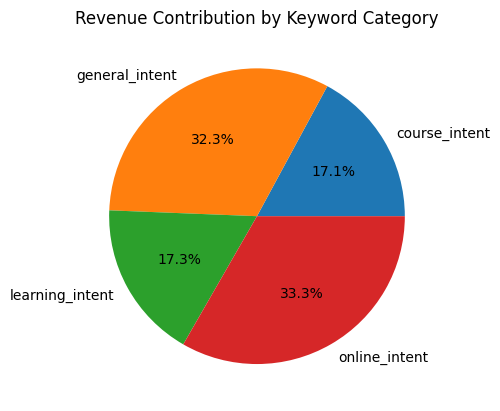

In [41]:
sales_keyword = data.groupby('Keyword_Category')['Sale_Amount'].sum()

plt.figure()
plt.pie(sales_keyword, labels=sales_keyword.index, autopct='%1.1f%%')
plt.title('Revenue Contribution by Keyword Category')
plt.show()


## 9)CPC vs Conversion Rate

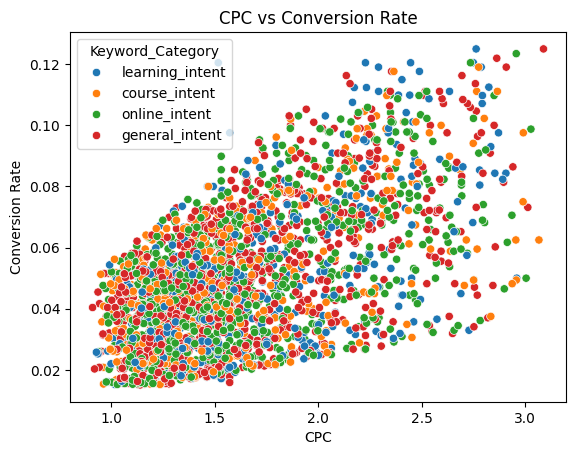

In [42]:
plt.figure()
sns.scatterplot(data=data, x='CPC', y='Conversion Rate', hue='Keyword_Category')
plt.title('CPC vs Conversion Rate')
plt.show()


## 10)Devcice Wise CLick Share

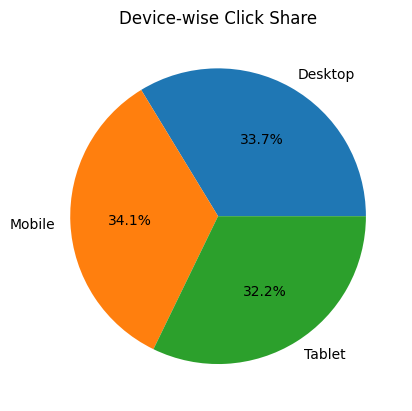

In [47]:
device_clicks = data.groupby('Device')['Clicks'].sum()

plt.figure()
plt.pie(device_clicks, labels=device_clicks.index, autopct='%1.1f%%')
plt.title('Device-wise Click Share')
plt.show()


## 11)HeatMap of device with keyword Category

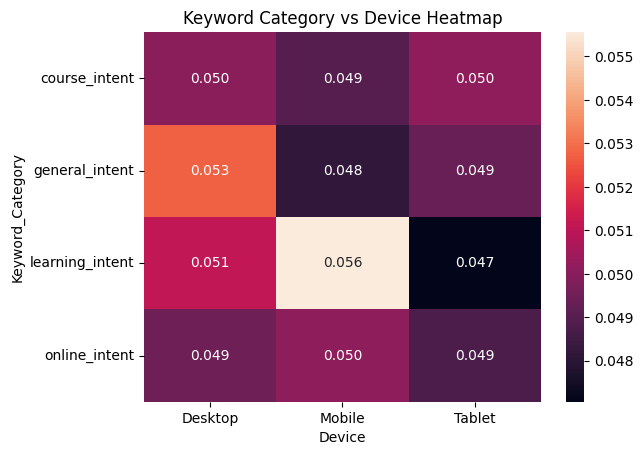

In [48]:
pivot = data.pivot_table(
    values='Conversion Rate',
    index='Keyword_Category',
    columns='Device',
    aggfunc='mean'
)

plt.figure()
sns.heatmap(pivot, annot=True, fmt='.3f')
plt.title('Keyword Category vs Device Heatmap')
plt.show()


## 12)HeatMap of Numeric Columns

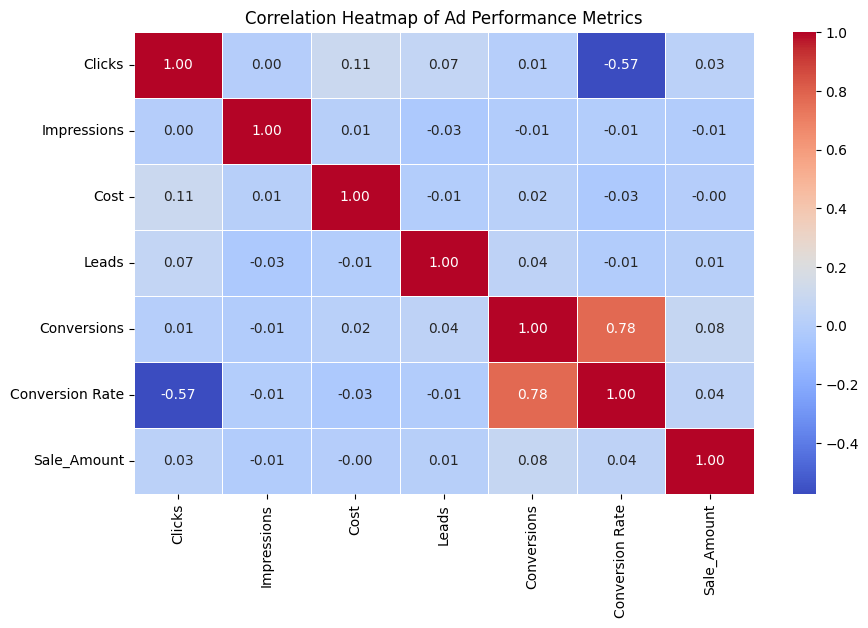

In [50]:
cols = ['Clicks','Impressions','Cost','Leads','Conversions','Conversion Rate','Sale_Amount']
corr = data[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of Ad Performance Metrics')
plt.show()


## 13)High vs Low performing ads

In [51]:
# define high vs low performance using median sales
median_sales = data['Sale_Amount'].median()

high_ads = data[data['Sale_Amount'] >= median_sales]
low_ads  = data[data['Sale_Amount'] < median_sales]


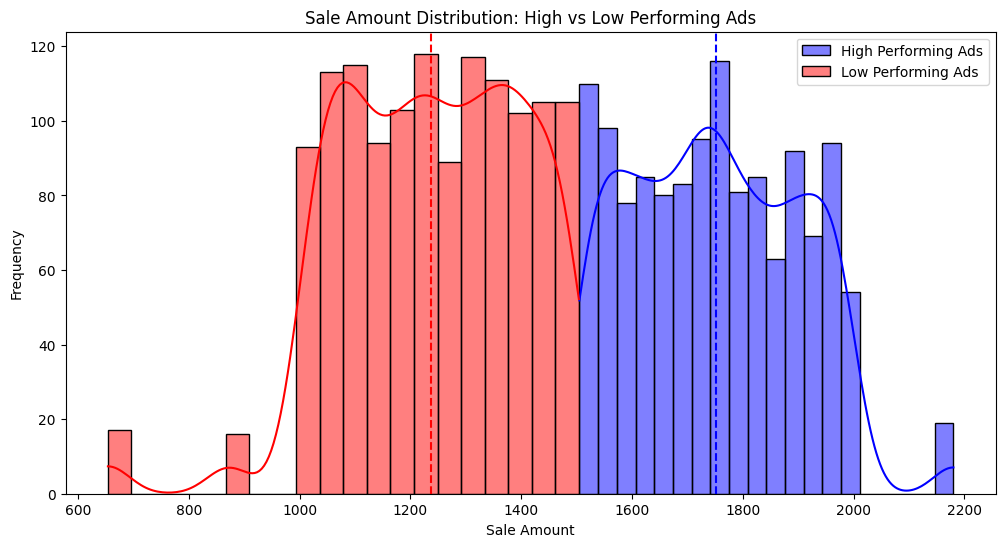

In [52]:
plt.figure(figsize=(12,6))

# Histogram + KDE for High Ads
sns.histplot(
    high_ads['Sale_Amount'],
    bins=20,
    kde=True,
    color='blue',
    alpha=0.5,
    label='High Performing Ads'
)

# Histogram + KDE for Low Ads
sns.histplot(
    low_ads['Sale_Amount'],
    bins=20,
    kde=True,
    color='red',
    alpha=0.5,
    label='Low Performing Ads'
)

# Mean lines
plt.axvline(high_ads['Sale_Amount'].mean(), color='blue', linestyle='--')
plt.axvline(low_ads['Sale_Amount'].mean(), color='red', linestyle='--')

plt.title('Sale Amount Distribution: High vs Low Performing Ads')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 14)Distribution of CPC by Device

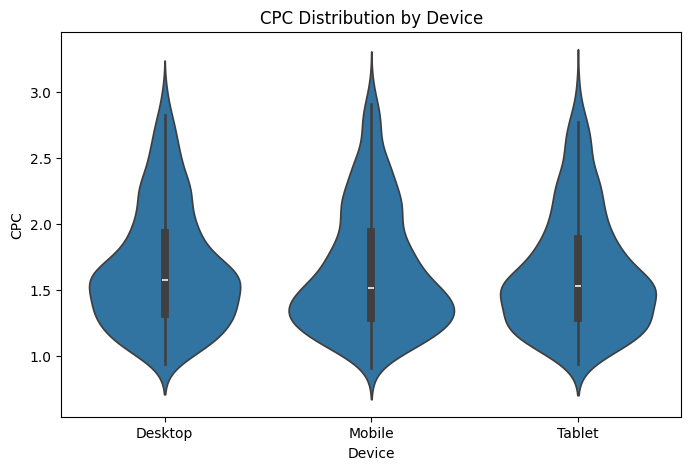

In [53]:
plt.figure(figsize=(8,5))
sns.violinplot(data=data, x='Device', y='CPC')
plt.title('CPC Distribution by Device')
plt.show()

## 15)Sale Amount by Keyword Category

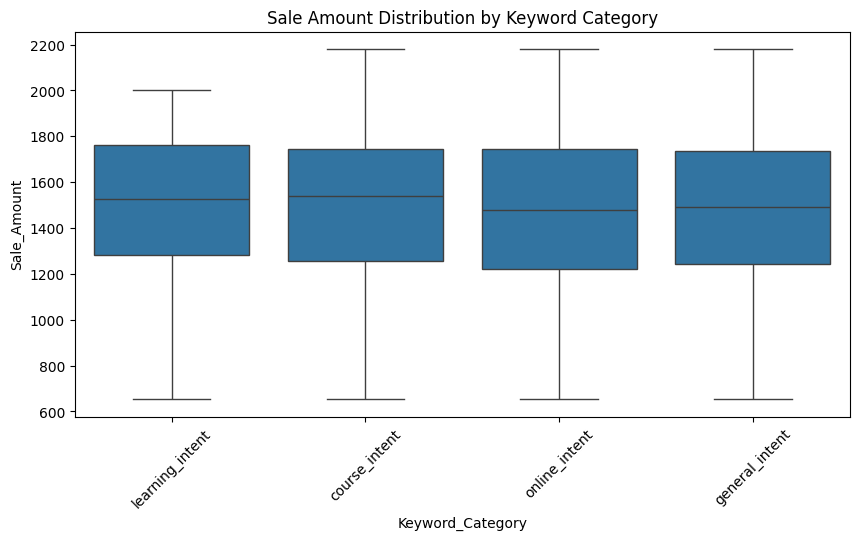

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Keyword_Category', y='Sale_Amount')
plt.xticks(rotation=45)
plt.title('Sale Amount Distribution by Keyword Category')
plt.show()
